<a href="https://colab.research.google.com/github/NMashalov/Ru-manim-tutorial/blob/main/manim_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import clear_output
!sudo apt update  > /dev/null
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev \
    texlive-lang-cyrillic  > /dev/null

!pip install manim
!pip install IPython --upgrade
clear_output()

In [ ]:
# перезапускаемся
import os
os.kill(os.getpid(), 9)

In [1]:
# проверяем, что все работает :)
from manim import (
    Scene,
    FadeIn, FadeOut,
    Group, VGroup,
    Transform,
    Text,Tex,MathTex, Write,
    LaggedStart,
    DOWN, UP, LEFT, RIGHT,
    RED, BLUE, GREEN, WHITE
)
# включаем русский язык для tex
from manim import TexTemplate
TexTemplate.default_preamble = r'''
\usepackage{amsmath}
\usepackage{amssymb}
\usepackage{amsthm}
\usepackage[T1,TS1,T2A]{fontenc}
\usepackage[utf8]{inputenc}
\usepackage[russian,english]{babel}'''

Manim Community v0.18.0

## Работа с графами
Документация: https://docs.manim.community/en/stable/reference/manim.mobject.graph.Graph.html#manim.mobject.graph.Graph

### Ненаправленный граф

In [2]:
from manim import Create,Graph

In [3]:
%%manim -qm -v WARNING ManimScene

class ManimScene(Scene):
    def construct(self):
        vertices = [1, 2, 3, 4, 5]
        vertices_location = {
            1: [-2, -2, 0],
            2: [-1, 0, 0],
            3: [0, 0, 0],
            4: [1, 2, 0],
            5: [2, -3, 0]
        }
        edges = [(1, 2), (2, 3), (3, 4), (4, 5),(5,1)]

        G = Graph(
            vertices,
            edges,
            layout=vertices_location
        )

        self.add(Text('Граф задается вершинами и ребрами').to_edge(UP))

        self.play(Create(G))

        self.wait()

### Динамиеское изменение layout графа и нумерация

In [4]:
%%manim -qm -v WARNING ManimScene

class ManimScene(Scene):
    def construct(self):
        vertices = [1, 2, 3, 4, 5,6,7]
        edges = [(1, 2), (1, 3), (2, 4), (2, 5), (3,6),(3,7)]

        G = Graph(
            vertices,
            edges,
            layout = "tree",
            root_vertex = 1,
            labels=True
        )

        self.play(Create(G))

        self.wait()

        self.play(G.animate.change_layout("circular"))
        self.wait()


In [15]:
list(range(1,8))

[1, 2, 3, 4, 5, 6, 7]

### Раскраска ребер и узлов

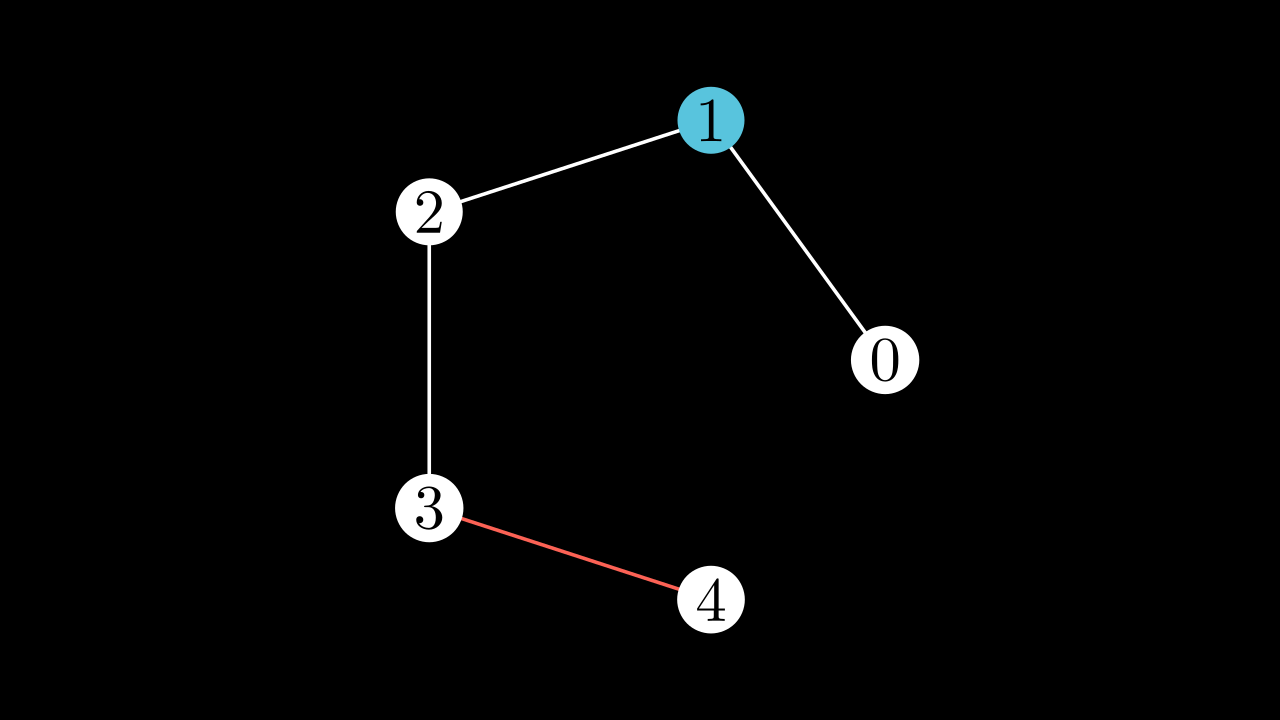

In [ ]:
%%manim -qm -v WARNING ManimScene

class ManimScene(Scene):
    def construct(self):

        vertices = [i for i in range(5)]
        edges = [
            (0, 1),
            (1, 2),
            (3, 2),
            (3, 4),
        ]

        edge_config = {
            (3, 4): {"color": RED},
        }

        vertex_config = {
            1: {"color": BLUE},
        }

        g = Graph(
            vertices,
            edges,
            labels=True,
            layout="circular",
            edge_config=edge_config,
            vertex_config = vertex_config
        ).scale(1.4)
        self.add(g)

### Тренировка 🏋️
Напишем код для задания цепи из 20 узлов

In [11]:
%%manim -qm -v WARNING ManimScene

class ManimScene(Scene):
    def construct(self):
        vertices = [0,1,2,3,4]
        edges = [(0,1),(1,2),(2,3),(3,4)]

        G = Graph(
            vertices,
            edges,
            layout = "spiral"
        )

        self.play(Create(G),)
        self.wait()

In [13]:
%%manim -qm -v WARNING ManimScene

class ManimScene(Scene):
    def construct(self):
        n = 20
        vertices = list(range(n)) # [0,...,19]
        edges = [(vert,vert+1) for vert in vertices[:-1]]

        G = Graph(
            vertices,
            edges,
            layout = "random"
        )

        self.play(Create(G),FadeIn(Text("Случайная инициализация графа").to_edge(UP)))

        self.wait()

        self.play(G.animate.change_layout("spiral"))
        self.wait()


Сколько узлов в полном дереве?

[1, 2, 3, 4, 5, 6, 7]

Как задать ребра в дереве?


In [26]:
n = 3
vert = 2**(n-1) -1
edges = []
for i in range(1,vert+1):
    edges.extend([(i, 2*i ),(i, 2*i +1)])
edges.pop(-1)
edges

[(1, 2), (1, 3), (2, 4), (2, 5), (3, 6)]

Нарисуем дерево глубины 4

In [28]:
%%manim -qm -v WARNING ManimScene

class ManimScene(Scene):
    def construct(self):
        n = 4

        vertices = list(range(1, 2**(n)))

        edges = []
        for i in range(1,2**(n-1)):
            edges.extend([(i, 2*i ),(i, 2*i +1)])

        G = Graph(
            vertices,
            edges,
            layout = "tree",
            labels=True,
            root_vertex=1
        ).scale(2)

        self.play(Create(G),FadeIn(Text("Дерево глубины 4").to_edge(UP)))
        self.wait()


Проверим бывает ли небинарные

In [33]:
%%manim -qm -v WARNING ManimScene

class ManimScene(Scene):
    def construct(self):
        n = 4

        vertices = [1,2,3,4,5]
        edges = [(1,2),(1,3),(2,4),(1,5)]

        G = Graph(
            vertices,
            edges,
            layout = "tree",
            labels=True,
            root_vertex=1
        ).scale(1.2)


        self.play(Create(G))
        self.wait()




Как раксрасить одну из вершин графа?

In [7]:
from manim import Flash,YELLOW

In [9]:
%%manim -qm -v WARNING ManimScene

class ManimScene(Scene):
    def construct(self):

        vertices = [i for i in range(5)]
        edges = [
            (0, 1),
            (1, 2),
            (3, 2),
            (3, 4),
        ]


        g = Graph(
            vertices,
            edges,
            labels=True,
            layout="circular",
        ).scale(1.4)
        self.add(g)


        self.play(g.vertices[2].animate.set_color(RED))
        self.play(Flash(g.vertices[3],color=YELLOW,flash_radius=1.5))
        self.wait()

### Направленный граф

In [34]:
from manim import DiGraph

In [35]:
%%manim -qm -v WARNING ManimScene

class ManimScene(Scene):
    def construct(self):
        vertices = [1, 2, 3, 4, 5]

        edges = [(1, 2), (2, 3), (3, 4), (4, 5),(5,1)]

        G = DiGraph(vertices, edges, layout = 'circular')

        self.play(Create(G))

        self.wait()

### Тренировка 🏋️
Попробуйте layout `spring`,
 `spectral`,  `random`

In [ ]:
%%manim -qm -v WARNING ManimScene

class ManimScene(Scene):
    def construct(self):
        layouts = ['spring','spectral'] +['random']*2
        vertices = list(range(10))

        edges = [(i,i+1) for i in vertices[:-1]]

        G = DiGraph(vertices, edges, layout = 'spiral')
        self.play(Create(G))

        # <ВАШ КОД>



`kamada-kawai` layout
Минимазация расстояния между соединеными вершинами

In [ ]:
%%manim -qm -v WARNING ManimScene

class ManimScene(Scene):
    def construct(self):
        vertices = [1, 2, 3, 4, 5, 6, 7, 8]
        edges = [(1, 7), (1, 8), (2, 3), (2, 4), (2, 5),
                 (2, 8), (3, 4), (6, 1), (6, 2),
                 (6, 3), (7, 2), (7, 4)]


        G = DiGraph(vertices, edges, layout = 'circular')
        self.play(Create(G))

        self.play(G.animate.change_layout('kamada_kawai'))
        self.wait()

### Пакет для физической анимации manim-physics

[Документация](https://manim-physics.readthedocs.io/en/latest/reference.html)


In [36]:
!pip install -q manim-physics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 530.2/530.2 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 22.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 kB 8.0 MB/s eta 0:00:00


## Электрическое и магнинтное поле



In [37]:
from manim_physics import Charge, ElectricField

$$
    E = q \vec{r} / |r|^3
$$

In [38]:
%%manim -qm -v WARNING ManimScene
class ManimScene(Scene):
    def construct(self):
        charge1 = Charge(-1, LEFT + DOWN)
        charge2 = Charge(2, RIGHT + DOWN)
        charge3 = Charge(-1, UP)
        field = ElectricField(charge1, charge2, charge3)
        self.add(charge1, charge2, charge3)
        self.play(Create(field))

## Сдвинем заряды

In [ ]:
%%manim -qm -v WARNING ManimScene
class ManimScene(Scene):
    def construct(self):
        charge1 = Charge(-1, LEFT + DOWN)
        charge2 = Charge(2, RIGHT + DOWN)
        field = ElectricField(charge1, charge2,)
        self.add(charge1, charge2)
        self.play(Create(field))

        charge1_new = Charge(-1, 0.5 * LEFT + DOWN)
        new_field = ElectricField(charge1_new, charge2)

        self.play(Transform(charge1,charge1_new ),Transform(field,new_field))
        self.wait()

In [39]:
%%manim -qm -v WARNING ManimScene
class ManimScene(Scene):
    def construct(self):
        charge1 = Charge(-1, LEFT + DOWN)
        charge2 = Charge(2, RIGHT + DOWN)
        field = ElectricField(charge1, charge2,)
        self.add(charge1, charge2)
        self.play(Create(field))

        charge1_new = Charge(-1, 4 * LEFT + DOWN)
        new_field = ElectricField(charge1_new, charge2)

        self.play(Transform(charge1,charge1_new ),Transform(field,new_field))
        self.wait()

In [42]:
from manim_physics import Wire,  MagneticField, ThreeDScene
from manim import Square, Circle,Triangle
import numpy as np

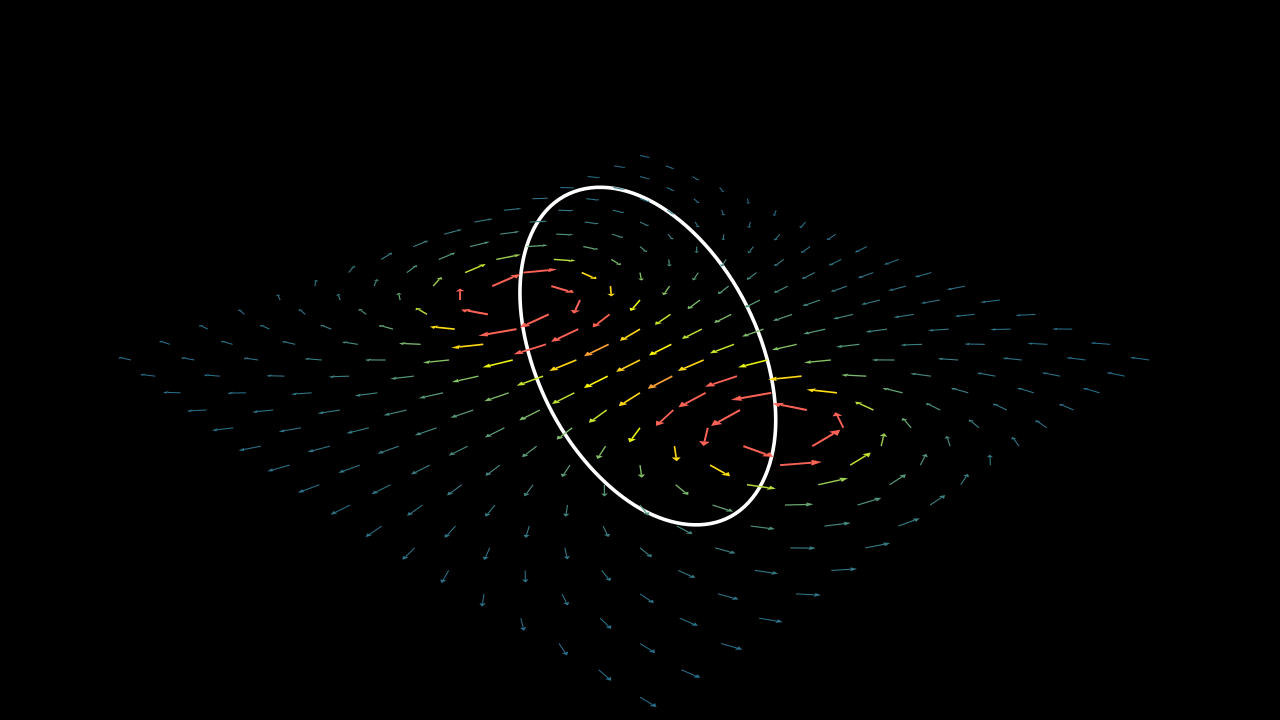

In [43]:
%%manim -qm -v WARNING ManimScene
class ManimScene(ThreeDScene):
    def construct(self):
        wire = Wire(Circle(2).rotate(np.pi / 2, UP))
        mag_field = MagneticField(
            wire,
            x_range=[-4, 4],
            y_range=[-4, 4],
        )
        self.set_camera_orientation(np.pi / 3, np.pi / 4)
        self.add(wire, mag_field)

### Тренировка  🏋️

Измените форму на треугольник и сдвиньте по диагонали XI

In [45]:
%%manim -qm -v WARNING ManimScene
class ManimScene(ThreeDScene):
    def construct(self):
        wire = Wire(Triangle().scale(2).rotate(np.pi / 2, UP))
        mag_field = MagneticField(
            wire,
            x_range=[-4, 4],
            y_range=[-4, 4],
        )
        self.set_camera_orientation(np.pi / 3, np.pi / 4)
        self.add(wire, mag_field)

        wire2 = Wire(Triangle().scale(2).rotate(np.pi / 2, UP)).shift(RIGHT+UP)

        mag_field_2 = MagneticField(
            wire2,
            x_range=[-4, 4],
            y_range=[-4, 4],
        )

        self.play(Transform(wire,wire2),Transform(mag_field,mag_field_2 ))
        self.wait()

Разобрать ситуацию с нескольким катушками

In [53]:
%%manim -qm -v WARNING ManimScene
class ManimScene(ThreeDScene):
    def construct(self):
        wire_1 = Wire(Triangle().scale(2).rotate(np.pi / 2, UP)).shift(3*(LEFT+DOWN))
        wire_2 = Wire(Circle().scale(2).rotate(np.pi / 2, UP)).shift(3*(RIGHT+UP))
        mag_field = MagneticField(
            wire_1,wire_2,
            x_range=[-4, 4],
            y_range=[-4, 4],
        )

        self.set_camera_orientation(np.pi / 3, np.pi / 4)
        self.add(wire_1,wire_2)

ValueError: too many values to unpack (expected 2)

## Динамика

In [54]:
from manim import DrawBorderThenFill,Line

from manim_physics import SpaceScene

In [55]:
%%manim -qm -v WARNING ManimScene
# use a SpaceScene to utilize all specific rigid-mechanics methods
class ManimScene(SpaceScene):
    def construct(self):
        circle = Circle().shift(UP)
        circle.set_fill(RED, 1)
        circle.shift(DOWN + RIGHT)

        rect = Square().shift(UP)
        rect.rotate(np.pi / 4)
        rect.set_fill(BLUE, 1)
        rect.shift(UP * 2)
        rect.scale(0.5)

        ground = Line([-4, -3.5, 0], [4, -3.5, 0])
        wall1 = Line([-4, -3.5, 0], [-4, 3.5, 0])
        wall2 = Line([4, -3.5, 0], [4, 3.5, 0])
        walls = VGroup(ground, wall1, wall2)
        self.add(walls)

        self.play(
            DrawBorderThenFill(circle),
            DrawBorderThenFill(rect),
        )
        self.make_rigid_body(rect, circle)  # Mobjects will move with gravity
        self.make_static_body(walls)  # Mobjects will stay in place
        self.wait(5)
        # during wait time, the circle and rect would move according to the simulate updater

### Тренировка  🏋️
Спуск круга по наклонной поверхности

In [57]:
%%manim -qm -v WARNING ManimScene
# use a SpaceScene to utilize all specific rigid-mechanics methods
class ManimScene(SpaceScene):
    def construct(self):
        circle = Circle().shift((-3.9,3,0))
        ground = VGroup(Line((-8,2,0),(-4,2,0)),Line((-4, 2, 0), (4, -4, 0)))

        self.add(ground, circle)

        self.make_rigid_body(circle)
        self.make_static_body(ground)

        self.wait(4)

Нарисуйте движение объекта по параболе

In [59]:
from manim import ParametricFunction

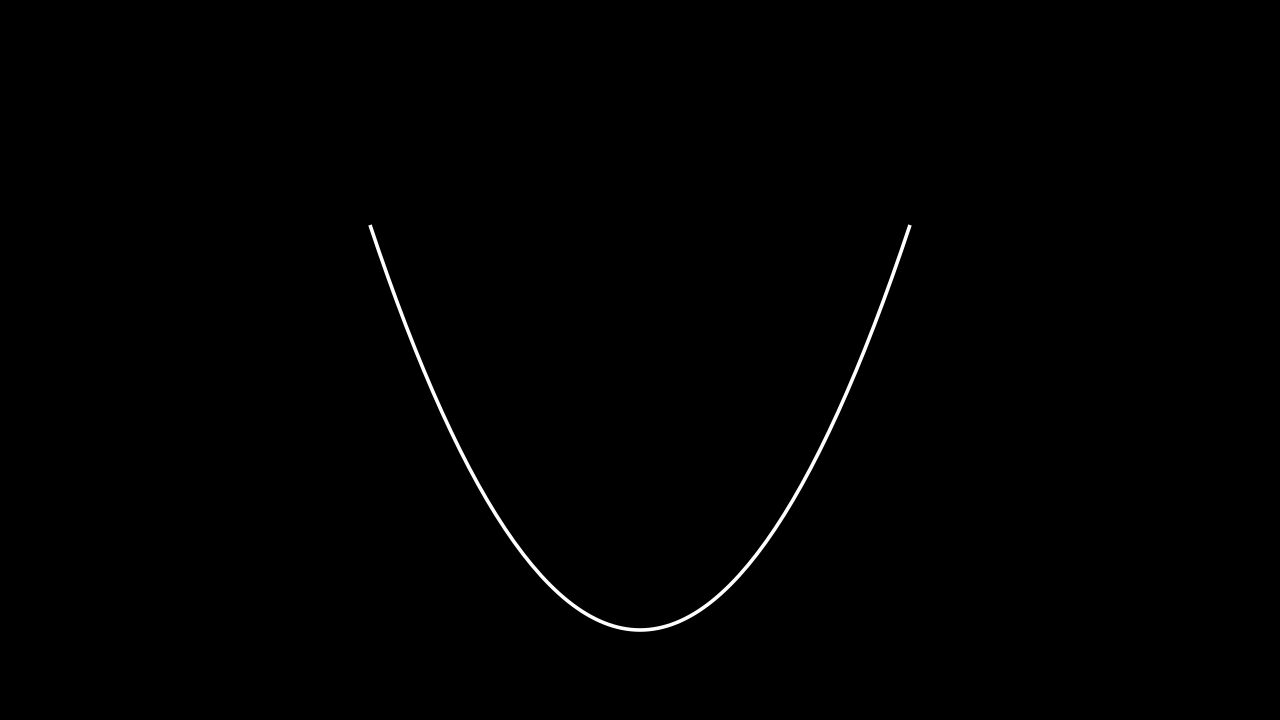

In [64]:
%%manim -qm -v WARNING ManimScene
class ManimScene(Scene):
    def construct(self):
        parabola = ParametricFunction(lambda t: (t,0.5*t**2-3,0), t_range=np.array([-3, 3, 0.1]))
        self.add(parabola)

In [67]:
%%manim -qm -v WARNING ManimScene
# use a SpaceScene to utilize all specific rigid-mechanics methods
class ManimScene(SpaceScene):
    def construct(self):
        circle = Circle().scale(0.1).shift((-2,3,0))
        ground =  VGroup(ParametricFunction(lambda t: (t,0.5*t**2-3,0), t_range=np.array([-3, 3, 0.1])))

        self.add(ground, circle)

        self.make_rigid_body(circle)
        self.make_static_body(ground)

        self.wait(4)

## Стоячие волны

In [68]:
from manim_physics import StandingWave

In [73]:
%%manim -qm -v WARNING ManimScene

class ManimScene(Scene):
    def construct(self):
        wave = StandingWave(3,amplitude=3, length=6, period= 1).shift(DOWN)
        self.add(wave)
        wave.start_wave()
        self.wait(5)

### Тренировка  🏋️

Поставьте волны в противофазу

In [74]:
from manim import DEFAULT_WAIT_TIME

In [75]:
DEFAULT_WAIT_TIME

1.0

In [76]:
%%manim -qm -v WARNING ManimScene
class ManimScene(Scene):
    def construct(self):
        wave1 = StandingWave(2, period= 2, color=BLUE)
        wave2= StandingWave(2, length=6,  period= 2, color=RED)
        self.add(wave1,wave2)
        wave1.start_wave()
        self.wait()
        wave2.start_wave()
        self.wait(5)

### Возмущение поверхности

In [ ]:
from manim_physics import LinearWave, ThreeDScene, DEGREES

In [ ]:
%%manim -qm -v WARNING ManimScene

class ManimScene(ThreeDScene):
    def construct(self):
        self.set_camera_orientation(60 * DEGREES, -45 * DEGREES)
        wave = LinearWave()
        self.add(wave)
        wave.start_wave()
        self.wait()
        wave.stop_wave()

## Домашнее задание 📝

- Поработайте с графами,например, с двудольными графами
Советую посмотреть на примеры анимации из https://slama.dev/manim/camera-and-graphs/
- изучите работу [модуля твердого тела](https://manim-physics.readthedocs.io/en/latest/reference/manim_physics.rigid_mechanics.rigid_mechanics.html). Реализуйте анимацию столкновения двух шаров

In [77]:
from manim import Flash, GREEN
import itertools

In [79]:
for cycle, color in zip(itertools.cycle((1,2,3)),['red','blue']*5):
    print(cycle,color)

1 red
2 blue
3 red
1 blue
2 red
3 blue
1 red
2 blue
3 red
1 blue


In [ ]:
%%manim -qm -v WARNING ManimScene

class ManimScene(Scene):
    def construct(self):
        colors = [RED, BLUE, GREEN]*20
        vertices = [1, 2, 3, 4, 5]

        edges = [(1, 2), (2, 3), (3, 4), (4, 5),(5,1)]

        G = Graph(vertices, edges, layout = 'circular')

        self.play(Create(G))

        self.wait()

        for i,color in zip(itertools.cycle(vertices),colors):
            self.play(
                Flash(G.vertices[i], color=color, flash_radius=0.3),
                G.vertices[i].animate.set_color(color),
            )
